In [1]:
import numpy as np
from numpy import pi, cos, sin, exp, log, arctan, absolute
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u
import ligo.skymap.plot


In [2]:
class Detector:
    def __init__(self, longitude, latitude):
        self.lon = longitude
        self.lat = latitude


/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous 

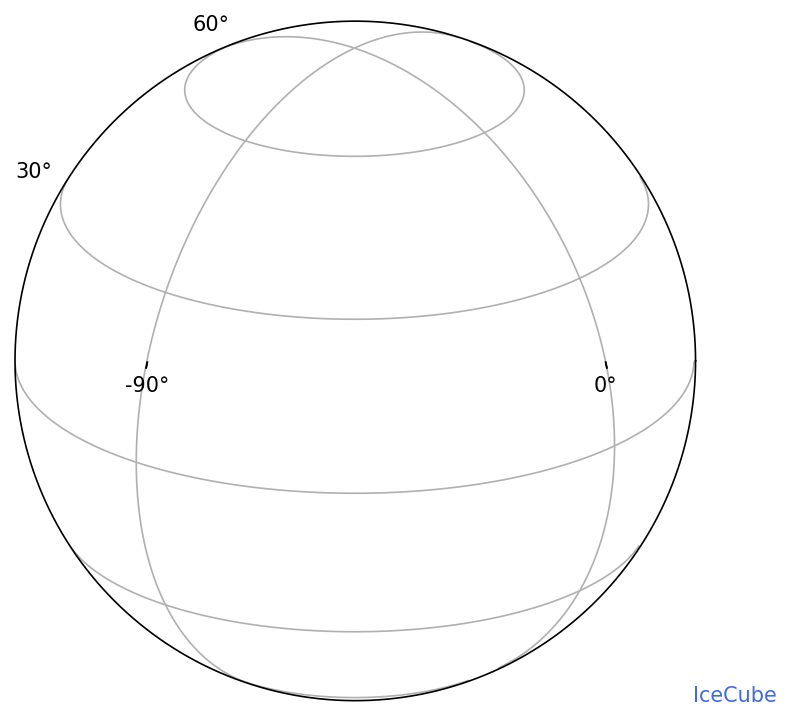

In [3]:
fig = plt.figure(figsize=(8,6), dpi=150)
ax = fig.add_subplot(111, projection="geo globe", center='-50d +23d')

# IceCube data
icecube = Detector(0, -pi/2)
icecube.points = np.array([[theta, phi] \
                           for theta in np.arange(60/180*pi, 95/180*pi, 0.05) \
                           for phi in np.arange(-pi, pi, 0.05)])

# plot IceCube data
ax.scatter(icecube.points[:,1], pi/2-icecube.points[:,0], alpha=.5, s=0.1, color='royalblue')
ax.plot(icecube.lon, icecube.lat+0.1, 'x', color='royalblue')
ax.text(icecube.lon+0.07, icecube.lat+0.17, 'IceCube', color='royalblue')

# config the axes
ax.set_xticks([-pi*2/3, -pi/3, 0, pi/3, pi*2/3])
ax.set_xticklabels(['16h', '20h', '0h', '4h', '8h'])
ax.set_yticks([-pi/3, -pi/6, 0, pi/6, pi/3])
ax.set_yticklabels([r'$-60^\circ$', r'$-30^\circ$', r'$0^\circ$', r'$30^\circ$', r'$60^\circ$'])
ax.grid(True)
fig.savefig('geoGlobe.png')

/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/Users/apple/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]


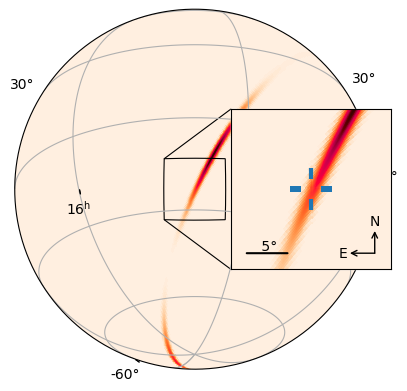

In [5]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt

url = 'https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz'
center = SkyCoord.from_name('NGC 4993')

fig = plt.figure(figsize=(4, 4), dpi=100)

ax = plt.axes(
    [0.05, 0.05, 0.9, 0.9],
    projection='astro globe',
    center=center)

ax_inset = plt.axes(
    [0.59, 0.3, 0.4, 0.4],
    projection='astro zoom',
    center=center,
    radius=10*u.deg)

for key in ['ra', 'dec']:
    ax_inset.coords[key].set_ticklabel_visible(False)
    ax_inset.coords[key].set_ticks_visible(False)
ax.grid()
ax.mark_inset_axes(ax_inset)
ax.connect_inset_axes(ax_inset, 'upper left')
ax.connect_inset_axes(ax_inset, 'lower left')
ax_inset.scalebar((0.1, 0.1), 5 * u.deg).label()
ax_inset.compass(0.9, 0.1, 0.2)

ax.imshow_hpx(url, cmap='cylon')
ax_inset.imshow_hpx(url, cmap='cylon')
ax_inset.plot(
    center.ra.deg, center.dec.deg,
    transform=ax_inset.get_transform('world'),
    marker=ligo.skymap.plot.reticle(),
    markersize=30,
    markeredgewidth=3)


In [6]:
url

'https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz'